In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_parquet("data/UN38.3/source.parquet", columns=["_time", "voltage", "current"]).set_index("_time")
df.index = df.index.tz_convert("Europe/Berlin")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2594773 entries, 2024-10-22 17:50:39.133871+02:00 to 2024-10-25 17:55:16.629333+02:00
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   voltage  float64
 1   current  float64
dtypes: float64(2)
memory usage: 59.4 MB


<Axes: xlabel='_time'>

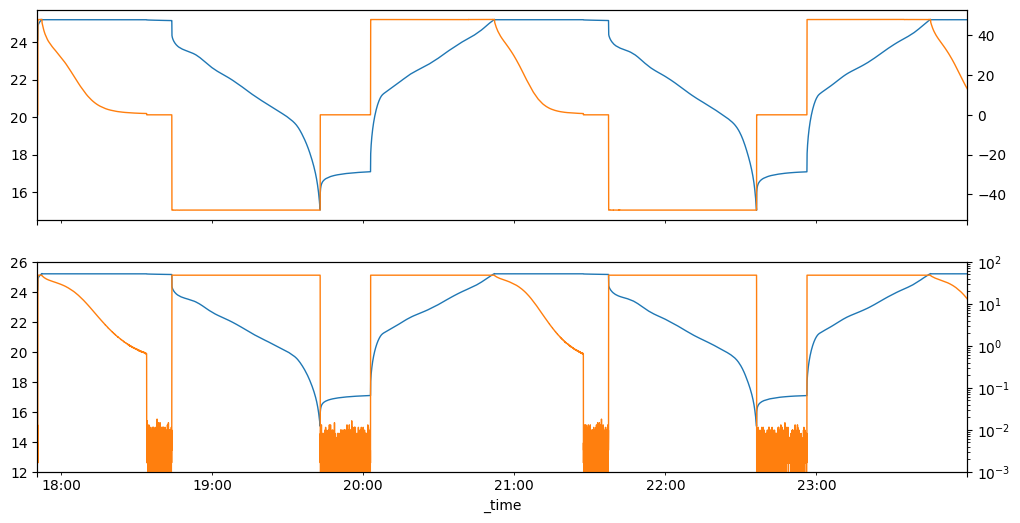

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

ax1r = ax1.twinx()
ax2r = ax2.twinx()

df.loc["2024-10-22", "voltage"].resample("1s").mean().plot(ax=ax1, lw=1, c="C0", label="Voltage")
df.loc["2024-10-22", "current"].resample("1s").mean().plot(ax=ax1r, lw=1, c="C1", label="Current")
df.loc["2024-10-22", "voltage"].resample("1s").mean().abs().plot(ax=ax2, lw=1, c="C0", ylim=(12, 26))
df.loc["2024-10-22", "current"].resample("1s").mean().abs().plot(ax=ax2r, lw=1, c="C1", logy=True, ylim=(.001, 100))


In [4]:
_current = df.loc["2024-10-22 18:35":"2024-10-25 17:30", "current"].resample("100ms").mean().interpolate()

high_threshold_crossings = (_current > 100e-3).astype(int).diff().fillna(0).astype(int).rename("c_high")
low_threshold_crossings = (_current < -100e-3).astype(int).diff().fillna(0).astype(int).rename("c_low")

charge_start = high_threshold_crossings.loc[high_threshold_crossings == 1]
charge_end = high_threshold_crossings.loc[high_threshold_crossings == -1]
discharge_start = low_threshold_crossings.loc[low_threshold_crossings == 1]
discharge_end = low_threshold_crossings.loc[low_threshold_crossings == -1]

# manually remove some outliers
charge_start.drop("2024-10-23 12:56:00.1", inplace=True)
charge_end.drop("2024-10-23 12:56:00.2", inplace=True)
discharge_start.drop("2024-10-25 17:25:09.7", inplace=True)

cycles = pd.concat([
    charge_start.reset_index().drop(columns="c_high").rename(columns={"_time": "charge_start"}),
    charge_end.reset_index().drop(columns="c_high").rename(columns={"_time": "charge_end"}),
    discharge_start.reset_index().drop(columns="c_low").rename(columns={"_time": "discharge_start"}),
    discharge_end.reset_index().drop(columns="c_low").rename(columns={"_time": "discharge_end"}),
], axis=1)
cycles


,charge_start,charge_end,discharge_start,discharge_end
0,2024-10-22 20:02:55.900000+02:00,2024-10-22 21:27:27.200000+02:00,2024-10-22 18:44:00.800000+02:00,2024-10-22 19:42:55.900000+02:00
1,2024-10-22 22:56:14.400000+02:00,2024-10-23 00:20:19.100000+02:00,2024-10-22 21:37:27.100000+02:00,2024-10-22 22:36:14.400000+02:00
2,2024-10-23 01:48:56.200000+02:00,2024-10-23 03:12:42.900000+02:00,2024-10-23 00:30:19.100000+02:00,2024-10-23 01:28:56.200000+02:00
3,2024-10-23 04:41:10.900000+02:00,2024-10-23 06:04:44.800000+02:00,2024-10-23 03:22:42.900000+02:00,2024-10-23 04:21:10.900000+02:00
4,2024-10-23 07:33:04.300000+02:00,2024-10-23 08:56:34.500000+02:00,2024-10-23 06:14:44.800000+02:00,2024-10-23 07:13:04.400000+02:00
5,2024-10-23 10:24:46.100000+02:00,2024-10-23 11:47:55.200000+02:00,2024-10-23 09:06:34.500000+02:00,2024-10-23 10:04:46.100000+02:00
6,2024-10-23 13:16:00.100000+02:00,2024-10-23 14:39:01.900000+02:00,2024-10-23 11:57:55.200000+02:00,2024-10-23 12:56:00.100000+02:00
7,2024-10-23 16:06:59.900000+02:00,2024-10-23 17:30:04.300000+02:00,2024-10-23 14:49:01.900000+02:00,2024-10-23 15:46:59.900000+02:00
8,2024-10-23 18:57:55.300000+02:00,2024-10-23 20:21:01.400000+02:00,2024-10-23 17:40:04.300000+02:00,2024-10-23 18:37:55.300000+02:00
9,2024-10-23 21:48:45.400000+02:00,2024-10-23 23:11:35.100000+02:00,2024-10-23 20:31:01.400000+02:00,2024-10-23 21:28:45.400000+02:00
